# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
k = tf.keras

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
(x_train, y_train), (x_test, y_test) = k.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 42s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

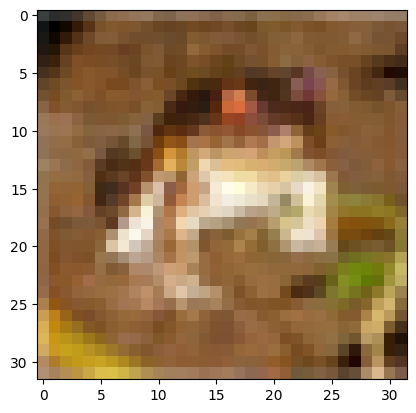

In [6]:
# FROG
plt.imshow(x_train[0])

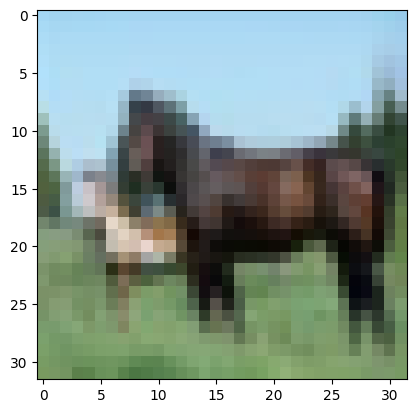

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
y_cat_train = k.utils.to_categorical(y_train,10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = k.utils.to_categorical(y_test,10)

----------
# Building the Model

In [21]:
model = k.Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(k.layers.Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(k.layers.MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(k.layers.Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(k.layers.MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(k.layers.Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(k.layers.Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(k.layers.Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [23]:
early_stop = k.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [24]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5303 - accuracy: 0.4520 - val_loss: 1.4400 - val_accuracy: 0.4776
Epoch 2/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1665 - accuracy: 0.5958 - val_loss: 1.2865 - val_accuracy: 0.5391
Epoch 3/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0101 - accuracy: 0.6486 - val_loss: 1.1886 - val_accuracy: 0.6003
Epoch 4/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9014 - accuracy: 0.6907 - val_loss: 1.1361 - val_accuracy: 0.6131
Epoch 5/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8217 - accuracy: 0.7174 - val_loss: 0.9977 - val_accuracy: 0.6602
Epoch 6/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7506 - accuracy: 0.7443 - val_loss: 1.1681 - val_accuracy: 0.6266
Epoch 7/15
1563/1563 [==============================] - 63s 41ms/step - loss: 0.6956 - accuracy: 0.7625 - val_loss: 0.9886 -

In [25]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [26]:
losses = pd.DataFrame(model.history.history)

In [27]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.530272,0.45196,1.440017,0.4776
1,1.166545,0.59576,1.286464,0.5391
2,1.010144,0.64860,1.188596,0.6003
3,0.901407,0.69068,1.136123,0.6131
4,0.821706,0.71744,0.997697,0.6602


<Axes: >

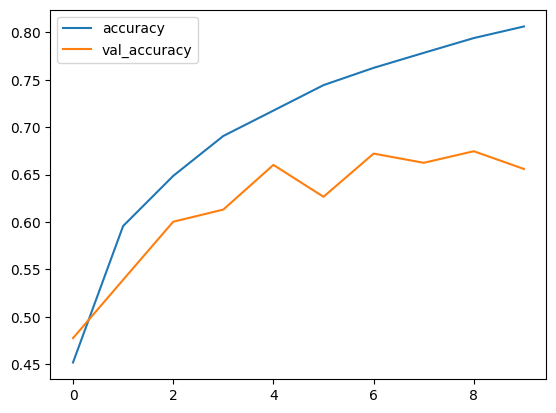

In [28]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

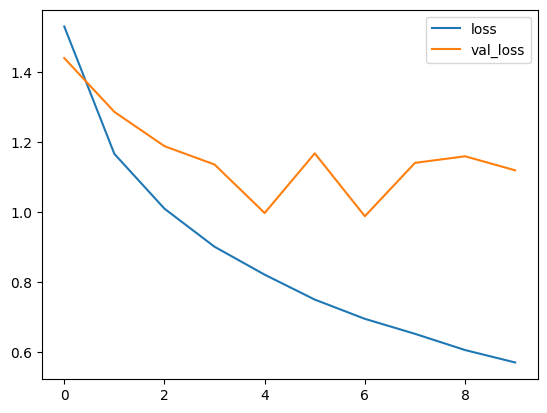

In [29]:
losses[['loss','val_loss']].plot()

In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.119655728340149, 0.6559000015258789]


In [32]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 4s 12ms/step


              precision    recall  f1-score   support

           0       0.85      0.54      0.66      1000
           1       0.87      0.76      0.81      1000
           2       0.66      0.40      0.50      1000
           3       0.45      0.55      0.49      1000
           4       0.50      0.76      0.60      1000
           5       0.60      0.53      0.56      1000
           6       0.60      0.86      0.71      1000
           7       0.80      0.64      0.71      1000
           8       0.82      0.72      0.76      1000
           9       0.70      0.81      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



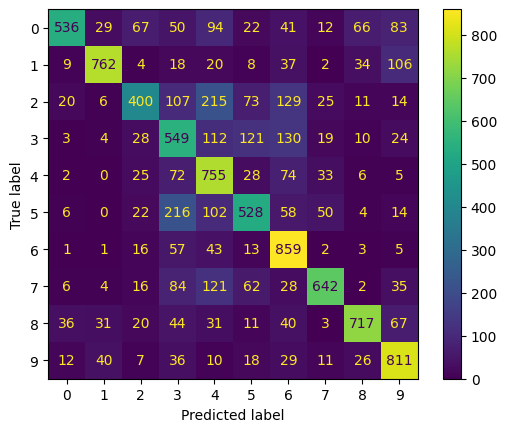

In [33]:
print(classification_report(y_test,predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions)).plot();

# Predicting a given image

In [34]:
my_image = x_test[16]

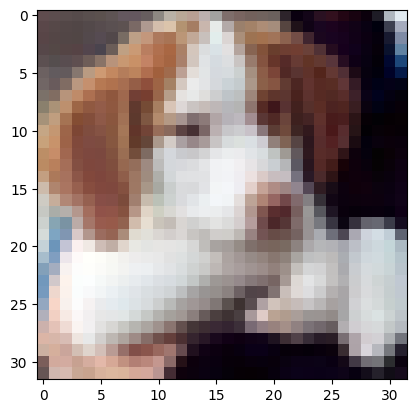

In [35]:
plt.imshow(my_image)

In [36]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3)).argmax()

1/1 [==============================] - 0s 21ms/step


5

In [37]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html